Hello, this is a program for the ising model. The Ising model is a mathematical model used in statistical mechanics to describe the behavior of magnetic materials, particularly ferromagnetic materials. 

Before we begin, here is a quick tutorial for the model. This is a model of scaler fields where each element in the field is affected by its nieghboring elements in a certain way. For the puropose of this python program, we are using the ising model to see how spin in each atom of ferromagnetic material is interacting wih each other and an external magnetic field. 

For this, we would need three different libraries: 
1. isinggame: It is a self created library, with a bunch of important functions that I will explain on the way.
2. time: I am going to use it to time my code, in order to find a way to make it faster.
3. numpy: I am going to use it when I am using my own algorigthm rather than metropolis algorithm.

Also, I have commented some code here, (the first 2 lines only) if you uncomment it, you will be able to see and store the images in this model in an svg formmat rather than png. This takes a while to render the images but if you would like to see them more clearly. Then, just uncomment the code.

Additionally you can also notice that I have uncommented an import statement as well. This is a cython library that I created to make the code work faster but it didn't work at all. The speed didn't increase. So, I am still working on making this library faster. It works almost as same as "isinggame". As far as this code is concerned both of them do the same thing. But you will have to compile this library before you run it here. To learn how to do this, I would recommend the going to section 4 "How to use cython" section of "read me.md".

Make sure that if you uncomment ising_cython, then you should comment out isinggame and vice versa.

In [1]:
# %config InlineBackend.figure_formats = ['svg']
# %matplotlib inline

import isinggame as ig
# import ising_cython as ig
import time as tm 
import numpy as np


First, we need a lattice to represent the field of ising model. For that, we specify, number of rows and number of columns. We also need 'time'. Time represents the number of iterations or changes that we will make to the field

In [2]:
start_time = tm.time()

rows = 100 
cols = 100
time = 10000 # Number of iterations or samples (reduced for quicker visualization)
# something wierd happns at beta = 10**18
beta = 10**18 # Beta = 1/(K_b * T)

Next, we use our handy field_generator to create a lattice and a magnetic field. Then, we create a model, using the datatype full_model. This datatype stores everything that we need to know about a model. 

Also, it automatically create 2 self initialized varaibles called net_energy and net_spin, which store the net_energy and net_apin at any one point in time.

In [3]:
lattice = ig.field_generator(rows,cols)
b_field = ig.field_generator(rows,cols)
model = ig.full_model(lattice=lattice, B_field=b_field, beta=beta)


These three things below are not for the algorithm, they are for presentation of resutls. These three lists achieve the following:
1. images: It is a list of 2d numpy arrays. It stores a deep copy of the lattice and each time the lattice passes through the algorithm and updates. The updated lattice gets appended to the list. Basically each element of this list stores a snapshot of the lattice with increasing time like a flip-book. I will show you how it is usefull later.

2. total_energy_list:  it stores all the net_energy values and appends itself when model gets updated.

3. total_spin_list:  it stores all the net_spin values and appends itself when model gets updated.

These lists might feel useless right now. But they will become very usefull later.


In [4]:
images = [lattice.copy()]
total_energy_list = [ig.get_net_energy(model)]
total_spin_list = [ig.get_net_spin(model)/(rows*cols)]

This is the fun part. Here we use the metropolis algorithm over time to update the model repeatedly. Then, we append some of those updates to the lists, we created before.

In [24]:
for i in range(time):
    ig.metropolis(model)
    if (i % int(time/1000) == 0):
        images.append(model.lattice.copy())
        total_energy_list.append(ig.get_net_energy(model))
        total_spin_list.append(ig.get_net_spin(model))

# This next line will start getting lower or higher as one color starts to dominate. To keep track of that uncomment the code below
# print(np.count_nonzero(model.lattice == -1))

This next bit is my own algorithm, it is same as metropolis alrorithm but it is a bit different. I am not sure if it right or wrong to use this algorithm but it is much faster than metropolis.

Look at section 2 of readme file to learn more about how this code operates. and uncoment the two sections below you to run the code.

In [6]:
# new_list = []
# change_list = []

# for i in range(rows):
#   for j in range(cols):
#       new_list.append((i,j))

# change_list = new_list.copy()

# count = 0
# for i in range(time):
#   if change_list != []:
#     row, col = change_list[0]
#     if ig.my_algorithm(model, row, col):
#         change_list.pop(0)
#         affected_components = [(row-1, col), (row+1, col), (row,col-1), (row,col+1)]
#         for affected_component in affected_components:
#             if affected_component in change_list:
#                   pass
#             else:
#                 affected_row,affected_col = affected_component
#                 if affected_row<rows and affected_col<cols: 
#                   if affected_row>0 and affected_col>0:
#                       count += 1
#                       change_list.append(affected_component)
#     else:
#       change_list.pop(0)
#     if (i % int(time/1000) == 0):
#       images.append(model.lattice.copy())
#       total_energy_list.append(ig.get_net_energy(model))
#       total_spin_list.append(ig.get_net_spin(model))

#   else:
#     change_list = new_list.copy()

# # this line will tell the number of elements left if change list and if will reduce with every iteration. 
# # Once, it stops reducing for a long time. It is safe to assume that we have reached some sort of equilibrium.
# print(len(change_list))


This is where we use our 'images' lists. You see, this display_ising_sequence function takes every elemnent in that list, creates a grayscale image where black = -1 and white = 1. And then stiches those images togethor, creating the soft version of a flipbook. Using the slider you can go ahead or behind in the frames and flip the book as you see fit, to see any descrepencies.

In [25]:
ig.display_ising_sequence(images)

interactive(children=(IntSlider(value=4500, description='frame', max=9000), Output()), _dom_classes=('widget-i…

<function isinggame.display_ising_sequence.<locals>._show(frame=(0, 9000))>

Here we use the other 2 lists, to create a graph of how the net energy changed with time and how the net spin changes with time. But remember, time just represents number of steps. It is only showing the change in energy with every step.

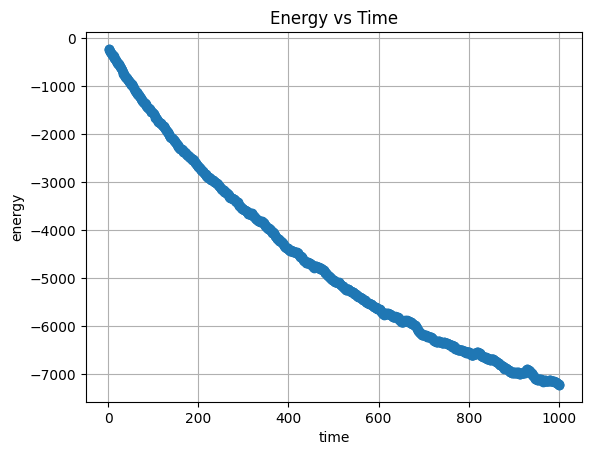

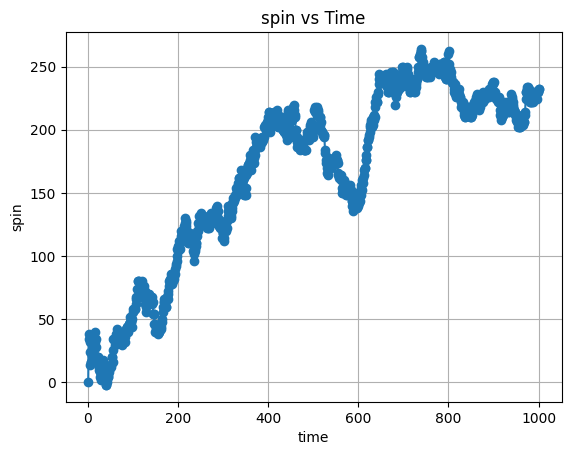

In [8]:
ig.graph_list(total_energy_list, "time", "energy", "Energy vs Time")
ig.graph_list(total_spin_list, "time", "spin", "spin vs Time")

This is commented code, because it is not always needed. Use it when you are satisfied with the results above because this code will create an output for that diplaying ising sequence as an animation.

We can see two lines of code, they do two different things, but the second line one is dependent on the first one. But not vice versa

1. display_ising_sequence_html: This function basically takes all the frames from that 'images' list we creates and exports all the frames out as a png file. Next, it will create an html file, if you run that html file, then a video like feed of all those images will run for you. And you can control it's speed direction and some more stuff. the folder_file_parameter requires you to provide a relative path for the html file. Also, wherever you store the html file. A folder will get created right next to it. That folder is called animation_frames and it stores all the png images that are used to create that html file.

2. export_mp4: This function can stich those animation frames into a video. Provide the relative path to the animation_frames folder you created in the previous function to the image_folder_name parameter and rest seems obvious.

Look at section 3 of the readme.md before uncommenting this code, to make sure that all prerequisites are met.

In [9]:
ig.display_ising_sequence_html(images, folder_file_name = "my_frame/animation.html")
ig.export_mp4(image_folder_name = "my_frame/animation_frames", output_file_name="my_animation", frame_rate=24)


True


this last thing is just to keep track of time. That's all.

In [10]:
end_time = tm.time()
total_time = end_time - start_time
print(f"Total time taken to run the notebook: {total_time} seconds")

Total time taken to run the notebook: 46.52996778488159 seconds


Very well, I hope you enjoyed this joyride. Please experiment away on this simulation. And let's see what we can find.